In [181]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [194]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

In [195]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [196]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations+1):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i, "/", iterations)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [197]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.05, 1000)

Iteration:  0 / 1000
[0 0 8 ... 8 2 0] [3 1 2 ... 9 3 2]
0.09641463414634147
Iteration:  10 / 1000
[0 0 5 ... 8 2 0] [3 1 2 ... 9 3 2]
0.1429512195121951
Iteration:  20 / 1000
[0 3 5 ... 9 2 0] [3 1 2 ... 9 3 2]
0.20085365853658538
Iteration:  30 / 1000
[0 3 5 ... 4 2 0] [3 1 2 ... 9 3 2]
0.25202439024390244
Iteration:  40 / 1000
[3 3 5 ... 4 2 0] [3 1 2 ... 9 3 2]
0.2982682926829268
Iteration:  50 / 1000
[3 3 5 ... 4 2 0] [3 1 2 ... 9 3 2]
0.3365365853658537
Iteration:  60 / 1000
[3 1 1 ... 4 2 0] [3 1 2 ... 9 3 2]
0.3688292682926829
Iteration:  70 / 1000
[3 1 1 ... 4 0 0] [3 1 2 ... 9 3 2]
0.39565853658536587
Iteration:  80 / 1000
[3 1 1 ... 9 0 0] [3 1 2 ... 9 3 2]
0.41929268292682925
Iteration:  90 / 1000
[3 1 1 ... 9 0 0] [3 1 2 ... 9 3 2]
0.44046341463414634
Iteration:  100 / 1000
[3 1 1 ... 9 0 0] [3 1 2 ... 9 3 2]
0.46339024390243905
Iteration:  110 / 1000
[3 1 1 ... 9 0 0] [3 1 2 ... 9 3 2]
0.48329268292682925
Iteration:  120 / 1000
[3 1 8 ... 9 0 2] [3 1 2 ... 9 3 2]
0.503414

In [199]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [200]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[7 6 7 7 4 7 7 1 2 4 1 7 0 1 0 2 0 0 1 0 2 8 7 9 2 8 1 3 9 7 0 0 1 4 3 3 7
 6 7 8 5 8 9 5 2 7 8 3 6 4 6 3 8 2 4 0 9 1 4 2 7 4 0 1 7 3 9 9 2 4 3 1 8 1
 2 7 6 2 9 1 1 1 7 6 7 9 6 2 9 9 3 0 7 4 6 7 0 4 8 2 9 3 9 9 2 0 6 1 1 8 3
 7 8 4 7 0 9 3 6 7 3 7 0 5 0 3 1 6 1 0 1 0 4 8 4 4 5 9 9 9 3 8 5 0 9 9 7 9
 2 4 7 9 9 4 0 0 3 9 6 1 6 5 2 7 2 6 5 7 0 9 6 2 8 6 4 9 9 6 3 9 9 2 7 4 8
 8 3 9 3 2 0 2 2 9 6 3 0 6 0 6 6 3 6 3 5 6 1 9 7 9 0 9 4 2 5 2 1 0 0 3 7 8
 5 8 1 0 5 4 8 5 2 4 0 2 0 2 4 3 9 7 4 6 7 9 7 1 9 7 4 0 3 5 9 6 9 8 6 9 3
 6 6 8 2 3 4 4 6 8 8 7 6 5 2 4 3 4 2 4 6 2 2 0 8 5 6 2 1 8 2 0 5 0 9 5 9 8
 7 4 0 5 3 6 9 0 1 7 7 8 3 1 2 5 9 0 8 5 9 7 3 3 8 3 4 0 3 8 7 9 8 0 4 6 6
 7 6 6 9 5 7 2 1 3 7 5 8 4 5 2 0 1 2 7 4 4 6 8 4 9 8 3 3 0 2 3 6 0 4 7 6 0
 6 7 2 4 8 2 8 7 7 9 3 7 8 3 4 9 7 8 9 7 6 2 2 8 6 8 2 3 0 6 4 0 2 7 0 7 2
 6 2 3 1 0 8 9 0 2 3 4 1 2 0 5 3 8 3 9 8 4 5 8 2 4 2 3 6 1 4 3 1 6 0 6 8 2
 7 6 3 1 3 0 9 7 1 3 1 6 3 2 7 9 8 1 6 3 2 0 3 9 2 0 5 5 4 3 8 9 9 3 6 0 5
 9 7 3 9 6 1 5 7 3 4 1 5 

0.831

Prediction:  [3]
Label:  3


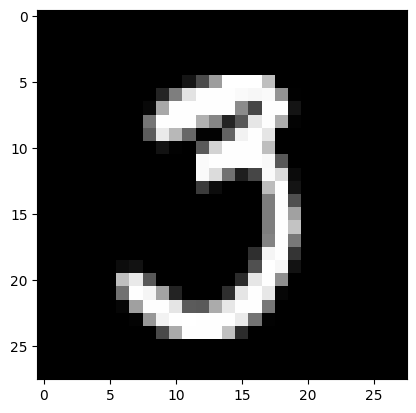

Prediction:  [1]
Label:  1


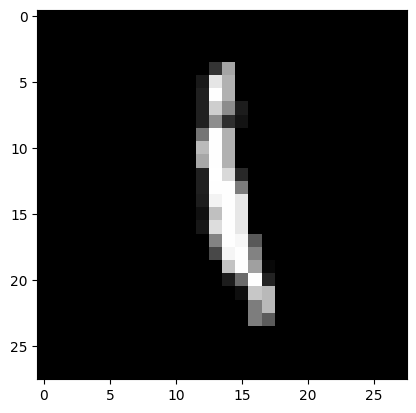

Prediction:  [2]
Label:  2


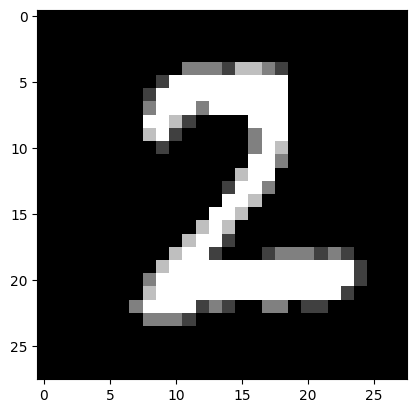

Prediction:  [1]
Label:  1


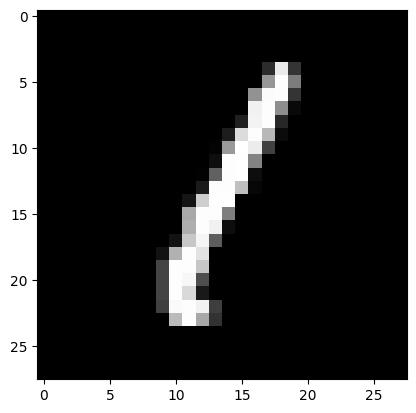

In [201]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)